# Data Visualization

### Visualization the Python way

+ <font color='red'>Matplotlib</font>
+ <font color='red'>Pandas</font>
+ Seaborn
+ Bokeh
+ ggplot
+ etc...

### Choosing a visualization package

+ Ease of learning
+ Documentation
+ Flexibility (Types of graphs that it provides)
+ Data type (statistical, scientific,...)
+ Data format (text, flat binary,...)
+ Data size (small, medium, BIG)

## Matplotlib
is a graphics library, designed for scientific computing, with

+ high quality 2D and 3D plots
+ output in all the usual formats (PDF, PNG, etc.)
+ LaTeX integration
+ animation, etc.


Matplotlib

The easiest way to interact with matplotlib is via pylab in iPython. By starting iPython (or iPython notebook) in "pylab mode", both matplotlib and numpy are pre-loaded into the iPython session:

ipython notebook --pylab

or you can import pyplot and numpy into a single namespace

from pylab import *

You can specify a custom graphical backend (e.g. qt, gtk, osx), but iPython generally does a good job of auto-selecting. Now matplotlib is ready to go, and you can access the matplotlib API via plt. If you do not start iPython in pylab mode, you can do this manually with the following convention:

import matplotlib.pyplot as plt

Matplotlib, pyplot and pylab: how are they related?

Matplotlib is the whole package; matplotlib.pyplot is a module in matplotlib; and pylab is a module that gets installed alongside matplotlib.

### MATLAB-style API 
Uses the the pylab module to instruct the interpreter to pull in some key functionality from matplotlib and numpy

In [122]:
import numpy as np
# Import pyplot for plotting (standard form of the import)
import matplotlib.pyplot as plt

# Magic function to make matplotlib inline
%matplotlib inline

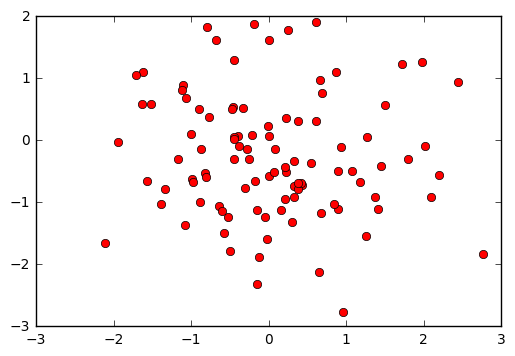

In [123]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

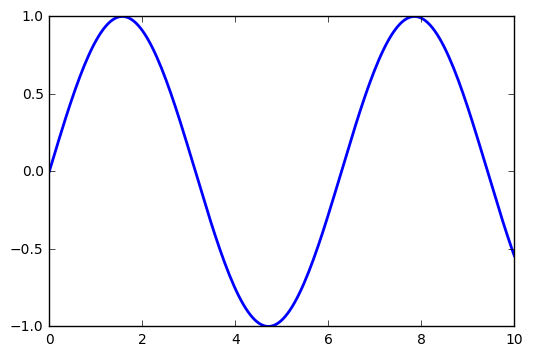

In [124]:
x = np.linspace(0, 10, 200)
y = np.sin(x)
# All of plotting functions expect np.array or np.ma.masked_array as input. 
plt.plot(x, y, 'b-', linewidth=2)

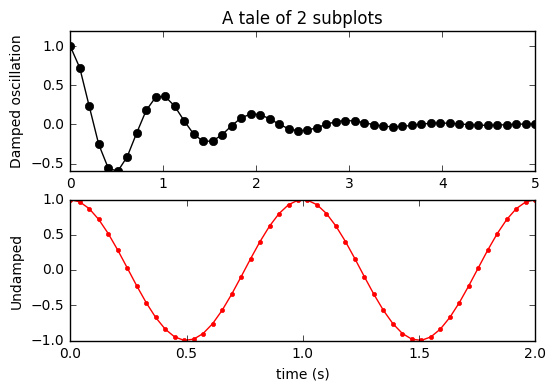

In [125]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'ko-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')


### The Object-Oriented API

<img src="https://matplotlib.org/_images/anatomy1.png" alt="Drawing" style="width: 600px;"/>

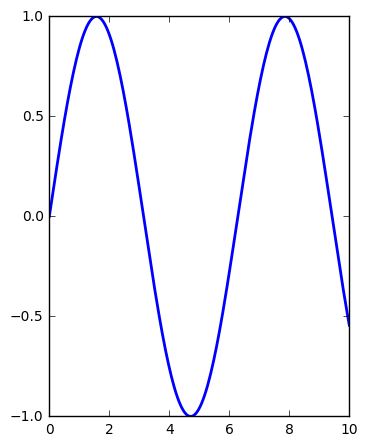

In [127]:
x = np.linspace(0, 10, 200)
y = np.sin(x)
fig = plt.figure()

# add_axes: [x_lo, y_lo, width, height] values between 0-1 in "figure dimensions"
ax = fig.add_axes([0, 0, 0.5, 1])     

ax.plot(x, y, 'b-', linewidth=2)    # note that plot is a method of ax

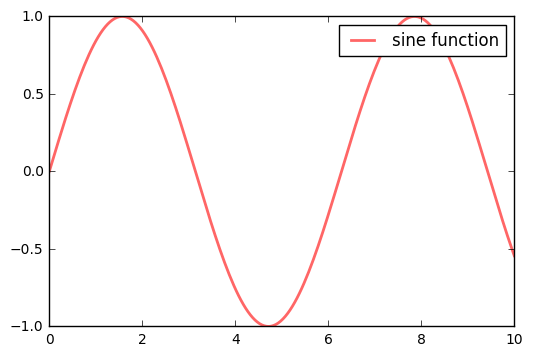

In [128]:
# Use subplot to create a figure plus a grid of axes 
fig, ax = plt.subplots()  # Generally: subplot(nrows, ncols, nsubplot)
# thus freeing us from creating axes coordinates manually

x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
# alpha makes the line slightly transparent - which makes it look smoother
ax.legend()

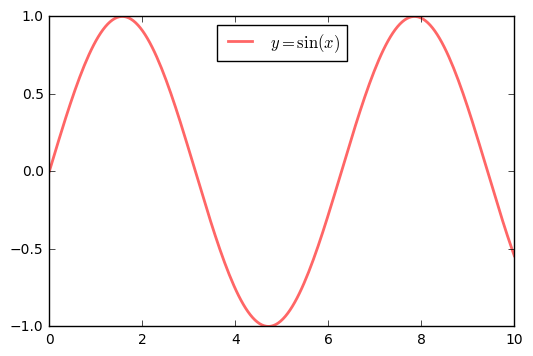

In [129]:
# Add LaTeX

fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)

# r in front of the label string tells Python that this is a raw string
ax.legend(loc='upper center')

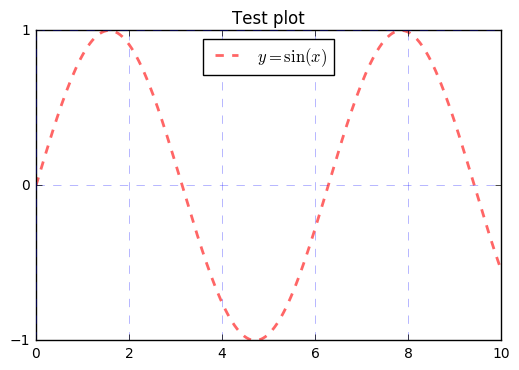

In [130]:
# Controlling the ticks and legend, adding titles and grid

fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)

ax.plot(x, y, 'r--', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
ax.grid(color='b', alpha=0.4, linestyle='dashed', linewidth=0.5)

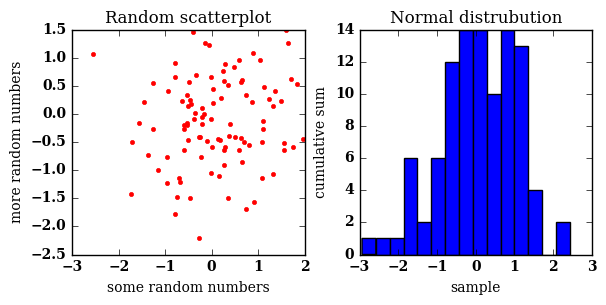

In [131]:
import matplotlib as mpl
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

#### [Cutomizing matplotlib](http://matplotlib.org/users/customizing.html)

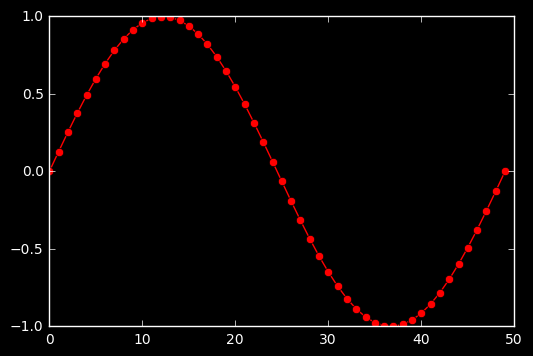

In [132]:
# plt.style.use
with plt.style.context(('dark_background')):
     plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')

### Multiple Plots on One Axis

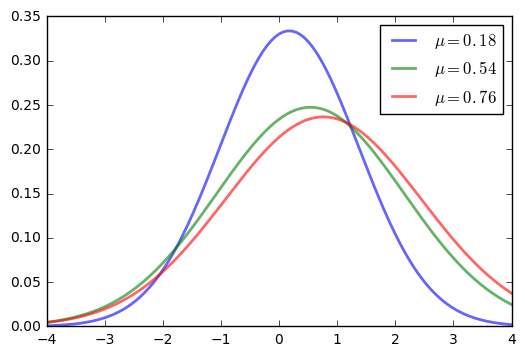

In [133]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = r'$\mu = {0:.2f}$'.format(m)
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()

### Multiple Subplots

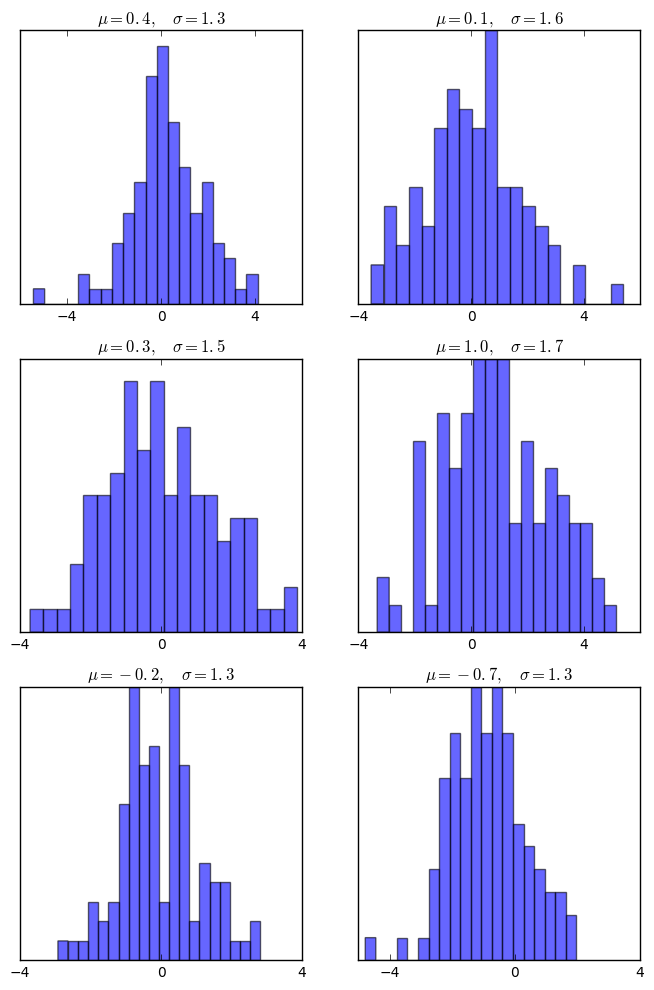

In [134]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = r'$\mu = {0:.1f}, \quad \sigma = {1:.1f}$'.format(m, s)
        axes[i, j].set_title(t)
        axes[i, j].set_xticks([-4, 0, 4])
        axes[i, j].set_yticks([])

### 3D Plots

In [135]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

$$
\begin{align}
z = \frac{cos(x^2 + y^2)}{1 + x^2 + y^2}
\end{align}
$$


(-0.5, 1.0)

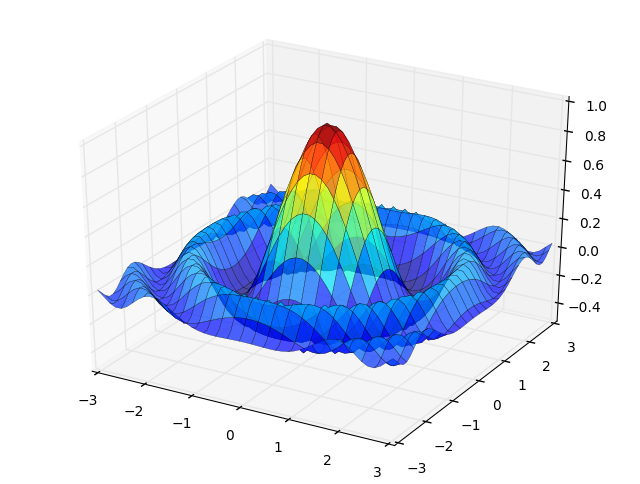

In [136]:
xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)

#### Reference: [Matplotlib gallery](http://matplotlib.org/gallery.html)

#### Exercise 
Given the following function:

In [137]:
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

Reference: [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system)

Complete the following code to make plots of the Lorenz attractor.

In [ ]:
import scipy.integrate

# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

# Integrate the Lorenz equations on the time grid t
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

# Plotting the Lorenz attractor

# Create figure and axes object usinb subplots function:
fig, ax = ----

# Plot x vs z (red-dashed line, use linewidth=0.5)
ax.plot(----)

# Add title and x/y labels (fontsize=18)
ax.----
ax.----
ax.----

# Optional: Repeat plot for x vs y, y vs z - i.e. plot all three in a 1x3 sunplot

### Using Pandas

Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

In [138]:
import pandas as pd
pd.set_option("max_rows", 10) # only 10 rows of data will be displayed
np.set_printoptions(suppress=True)
LARGE_FIGSIZE = (8, 6) # set figure size

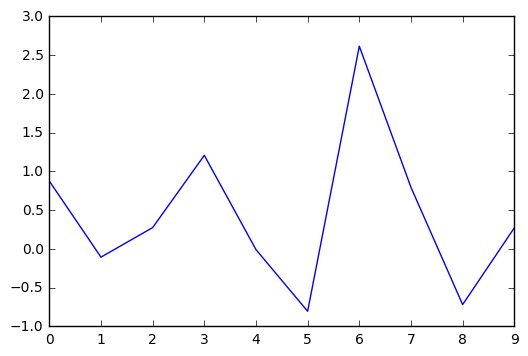

In [139]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

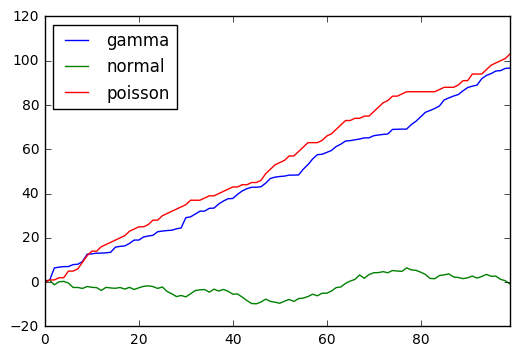

In [140]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for plot:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x127bc4290>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1129f4290>], dtype=object)

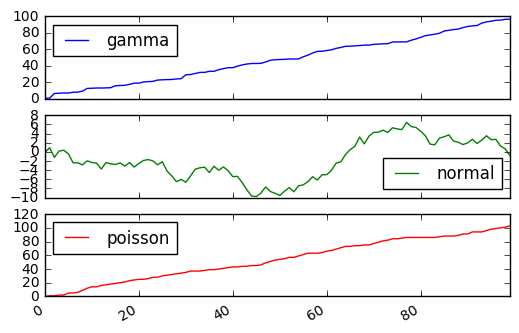

In [141]:
variables.cumsum(0).plot(subplots=True)

In [77]:
airports = pd.read_csv("http://ourairports.com/data/airports.csv", header=None, dtype=str)
airports.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
1,6523,00A,heliport,Total Rf Heliport,40.07080078125,-74.93360137939453,11,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
2,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
3,6524,00AK,small_airport,Lowell Field,59.94919968,-151.695999146,450,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
4,6525,00AL,small_airport,Epps Airpark,34.86479949951172,-86.77030181884766,820,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN


In [78]:
# The data doesn’t have column headers, so we add them in by assigning to the columns attribute. 
airports.columns = ["id", "ident", "type", "name", 
                    "latitude_deg", "longitude_deg", "elevation_ft", 
                    "continent","country", "region","municipality",
                    "service","gps_code", "iata_code", "local_code", 
                    "home_link", "wikipedia_link","keywords"]

### Static maps

Our data is inherently a good fit for mapping – we have latitude and longitude pairs for airports, and for source and destination airports.

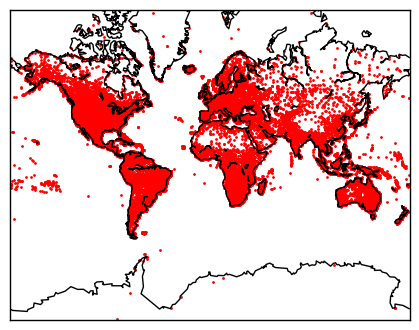

In [105]:
# Import the basemap package
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw.  
# We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
llon = [e for e in airports["longitude_deg"][1:]]
xc = [float(e) for e in llon]
llat = [e for e in airports["latitude_deg"][1:]]
yc = [float(e) for e in llat]
x, y = m(xc, yc)
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')

In [106]:
# Import data into a Pandas DataFrame
giss_temp = pd.read_table("https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.txt", 
                          sep="\s+", skiprows=7,
                          skip_footer=7, engine="python")
giss_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-30,-21,-18,-27,-14,-29,-24,-8,-17,-16,-19,-22,-20,***,****,-20,-20,-17,1880
1,1881,-11,-14,1,-3,-4,-28,-6,-2,-9,-19,-26,-15,-11,-12,-15,-2,-12,-18,1881
2,1882,10,10,2,-20,-17,-25,-10,4,0,-22,-20,-25,-10,-9,2,-12,-11,-14,1882
3,1883,-33,-42,-17,-24,-25,-12,-8,-12,-18,-11,-20,-18,-20,-21,-33,-22,-11,-16,1883
4,1884,-18,-11,-33,-35,-31,-37,-33,-25,-23,-21,-29,-28,-27,-26,-16,-33,-32,-24,1884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2013,68,55,65,53,61,65,59,67,78,70,81,67,66,65,59,60,64,76,2013
140,2014,74,53,78,79,87,66,58,82,91,86,68,80,75,74,65,81,69,82,2014
141,2015,82,87,91,76,78,78,72,79,82,107,102,111,87,85,83,81,77,97,2015
142,2016,115,134,130,109,93,79,83,99,89,89,90,80,99,102,120,111,87,89,2016


In [107]:
# Data transformation
giss_temp = giss_temp.set_index("Year")
giss_temp = giss_temp.drop("Year.1", axis=1)
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', 
                       u'Aug', u'Sep', u'Oct', u'Nov', u'Dec']]
giss_temp = giss_temp.drop("Year")  
giss_temp = giss_temp.where(giss_temp != "****", np.nan)
giss_temp['Jan'].astype('float')
for col in giss_temp.columns:
    giss_temp[col] = giss_temp[col].astype(np.float32)
giss_temp.index = giss_temp.index.astype(np.int32)
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-30.0,-21.0,-18.0,-27.0,-14.0,-29.0,-24.0,-8.0,-17.0,-16.0,-19.0,-22.0
1881,-11.0,-14.0,1.0,-3.0,-4.0,-28.0,-6.0,-2.0,-9.0,-19.0,-26.0,-15.0
1882,10.0,10.0,2.0,-20.0,-17.0,-25.0,-10.0,4.0,0.0,-22.0,-20.0,-25.0
1883,-33.0,-42.0,-17.0,-24.0,-25.0,-12.0,-8.0,-12.0,-18.0,-11.0,-20.0,-18.0
1884,-18.0,-11.0,-33.0,-35.0,-31.0,-37.0,-33.0,-25.0,-23.0,-21.0,-29.0,-28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,68.0,55.0,65.0,53.0,61.0,65.0,59.0,67.0,78.0,70.0,81.0,67.0
2014,74.0,53.0,78.0,79.0,87.0,66.0,58.0,82.0,91.0,86.0,68.0,80.0
2015,82.0,87.0,91.0,76.0,78.0,78.0,72.0,79.0,82.0,107.0,102.0,111.0


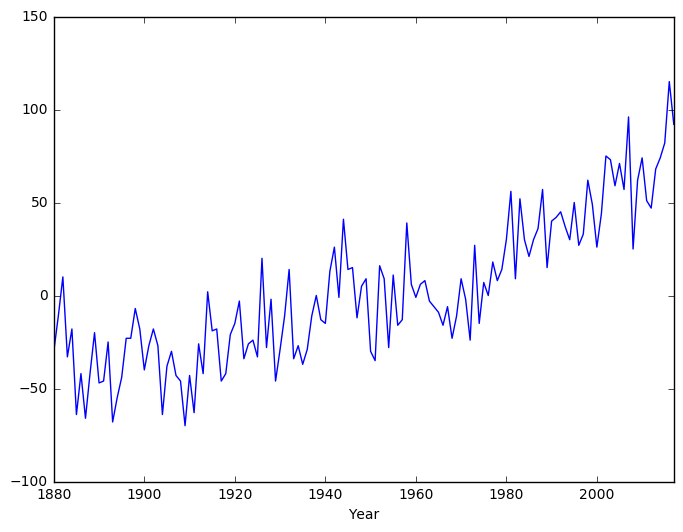

In [108]:
# Plotting
giss_temp.Jan.plot(figsize=LARGE_FIGSIZE)

/Users/ccruz/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x128061ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x12806ee10>,
 'fliers': [<matplotlib.lines.Line2D at 0x12803a150>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x128057ad0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12806e110>,
  <matplotlib.lines.Line2D at 0x129f59c10>]}

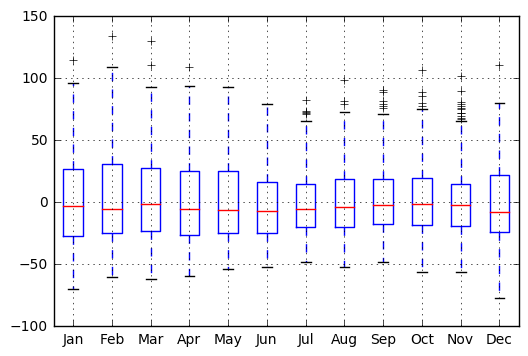

In [109]:
# A boxplot - all months
giss_temp.boxplot()

### Earth science datasets

Common data formats:

+ Text
+ Flat binary
+ NetCDF
+ Grib
+ HDF5

### Binary data

Data from [Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS Passive Microwave Data](http://nsidc.org/data/nsidc-0051.html).

In [ ]:
!wget ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_201512_f17_v1.1_n.bin

In [110]:
ice = np.fromfile('nt_201512_f17_v1.1_n.bin', dtype='uint8')

We use *uint8* data type. 

[List of numpy data types](http://docs.scipy.org/doc/numpy/user/basics.types.html)

We need to know about the data:

[Data description](http://nsidc.org/data/nsidc-0051)


In [111]:
ice = ice[300:]
# Reshape
ice = ice.reshape(448,304)

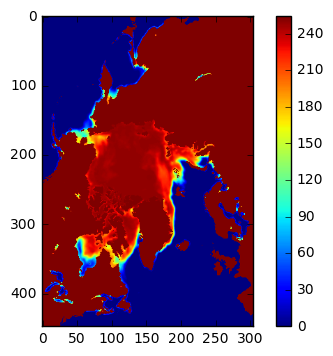

In [112]:
plt.imshow(ice)
plt.colorbar();

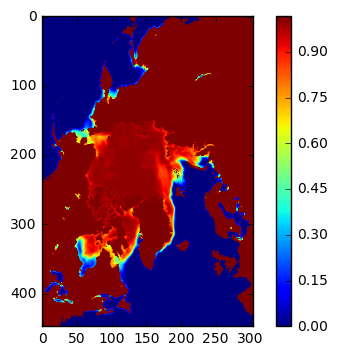

In [113]:
# To convert to the fractional parameter range of 0.0 to 1.0, 
# divide the scaled data in the file by 250.
ice = ice/250.
plt.imshow(ice)
plt.colorbar();

Exercise: Mask all land and missing values and re-plot.

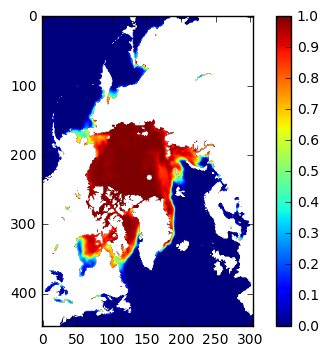

In [114]:
ice_masked = np.ma.masked_greater(ice, 1.0)
plt.imshow(ice_masked)
plt.colorbar();

### Open NetCDF files

NetCDF is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data.

First we need to import netCDF4-python, Numpy, Matplotlib for plotting, and Basemap for the map


In [115]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

Download [NCEP reanalysis data](http://www.esrl.noaa.gov/psd/data/reanalysis/reanalysis.shtml) daily air temperature for 2012.

In [ ]:
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis/surface/air.sig995.2012.nc

In [116]:
fnc = NetCDFFile('air.sig995.2012.nc')

In [117]:
fnc.description

u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'

In [118]:
fnc.history

u'created 2011/12 by Hoop (netCDF2.3)\nConverted to chunked, deflated non-packed NetCDF4 2014/09'

In [119]:
fnc.variables

OrderedDict([(u'lat', <type 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  actual_range: [ 90. -90.]
                  long_name: Latitude
                  standard_name: latitude
                  axis: Y
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'lon', <type 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: Longitude
                  actual_range: [   0.   357.5]
                  standard_name: longitude
                  axis: X
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                  delta

In [120]:
air = fnc.variables['air']

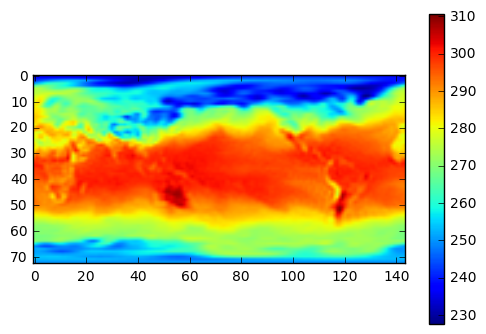

In [121]:
plt.imshow(air[0,:,:])
plt.colorbar();

### Conclusion

* Use Matplotlib for <font color='red'>basic plotting</font> and <font color='red'>advanced customization</font>
* Use Pandas for <font color='red'>text</font> data
* Use Seaborn for <font color='red'>1D and 2D statistical graphs</font>
* Use Bokeh for <font color='red'>web-based interactive</font> visualization
* Choose specialized package appropriate for data format (netCDF, HDF5)